# Importo le librerie necessarie

In [4]:
import re
import matplotlib.pyplot as plt


FILENAME = "55_mers_result_without-canonical.txt"

# Divide il testo in blocchi e vado ad estrarre:
    # 1. Required memory size in MB
    # 2. Total insertion
    # 3. Elapsed Time of insertion
 Successivamente calcolo: Number of insertion per second = Total insertion / Elapsed Time

In [5]:
import re

def parse_blocks(text):
    """
    Estrae i dati dai blocchi di risultati.
    """
    results = []

    # Dividi il testo in blocchi usando l'intestazione
    blocks = text.split("########### Results of dataset")

    for block in blocks:
        if not block.strip():
            continue

        try:
            # Estrai Total kmers
            kmers_match = re.search(r'Total kmers:\s*(\d+)', block)
            if not kmers_match:
                continue

            # Estrai Elapsed Time
            time_match = re.search(r'Elapsed Time of insertion:\s*([\d,]+)', block)
            if not time_match:
                continue
            elapsed_time = float(time_match.group(1).replace(',', '.'))

            # Estrai Insertion rate
            rate_match = re.search(r'Number of Insertion/Second:\s*([\d,]+)', block)
            if not rate_match:
                continue
            insertion_rate = float(rate_match.group(1).replace('.', '').replace(',', '.'))

            # Estrai Memory MB
            mem_match = re.search(r'Required memory size in bits and MB:\s*\d+\s+([\d,.]+)\s*MB', block)
            if not mem_match:
                continue
            memory_mb = float(mem_match.group(1).replace(',', '.'))

            results.append((memory_mb, insertion_rate, elapsed_time))

        except (ValueError, AttributeError) as e:
            continue

    return results

# Effettuo il barplot e lo scatterplot

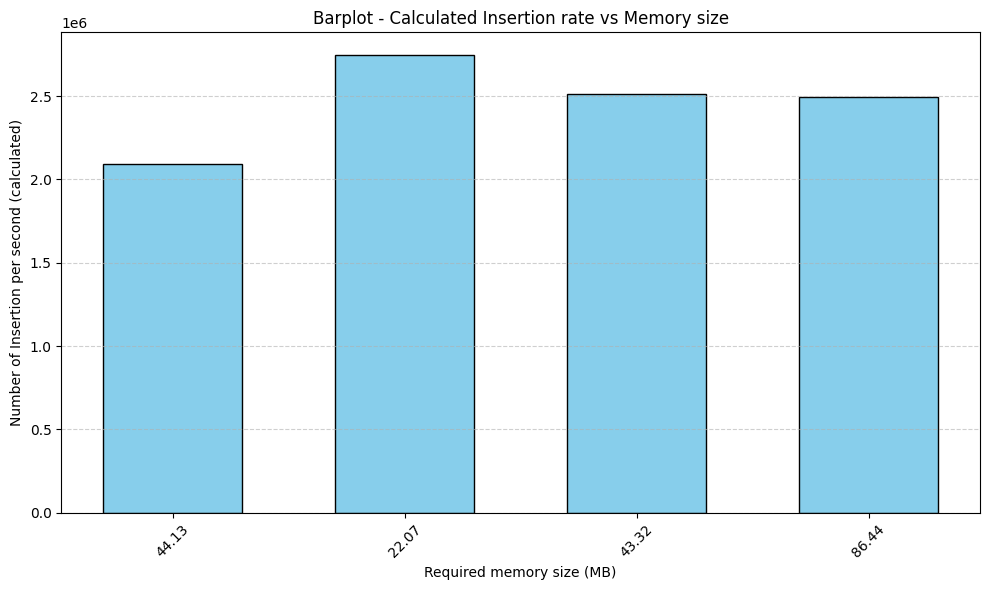

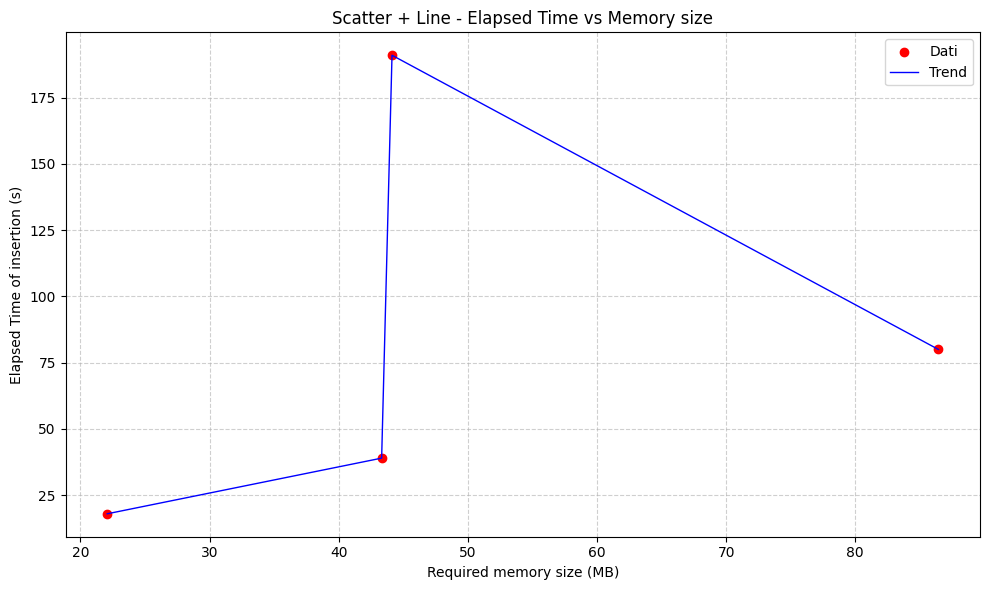

In [6]:
def plot_results(results):
    if not results:
        raise SystemExit("Nessun dato valido trovato nel file. Controlla il formato.")

    sizes, insertion_rates, elapsed_times = zip(*results)

    # --- BARPLOT ---
    indices = list(range(len(sizes)))
    plt.figure(figsize=(10,6))
    plt.bar(indices, insertion_rates, width=0.6, color='skyblue', edgecolor='black')
    plt.xticks(indices, [f"{s:.2f}" for s in sizes], rotation=45)
    plt.xlabel("Required memory size (MB)")
    plt.ylabel("Number of Insertion per second (calculated)")
    plt.title("Barplot - Calculated Insertion rate vs Memory size")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # --- SCATTER + LINE con Elapsed Time ---
    sorted_pairs = sorted(zip(sizes, elapsed_times), key=lambda x: x[0])
    sizes_sorted, times_sorted = zip(*sorted_pairs)
    plt.figure(figsize=(10,6))
    plt.scatter(sizes_sorted, times_sorted, color='red', label='Dati')
    plt.plot(sizes_sorted, times_sorted, color='blue', linestyle='-', linewidth=1, label='Trend')
    plt.xlabel("Required memory size (MB)")
    plt.ylabel("Elapsed Time of insertion (s)")
    plt.title("Scatter + Line - Elapsed Time vs Memory size")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    with open(FILENAME, "r", encoding="utf-8") as f:
        text = f.read()

    res = parse_blocks(text)
    plot_results(res)
